In [1]:
using CairoMakie
using NamedTrajectories

In [2]:
traj = rand(NamedTrajectory, 10);

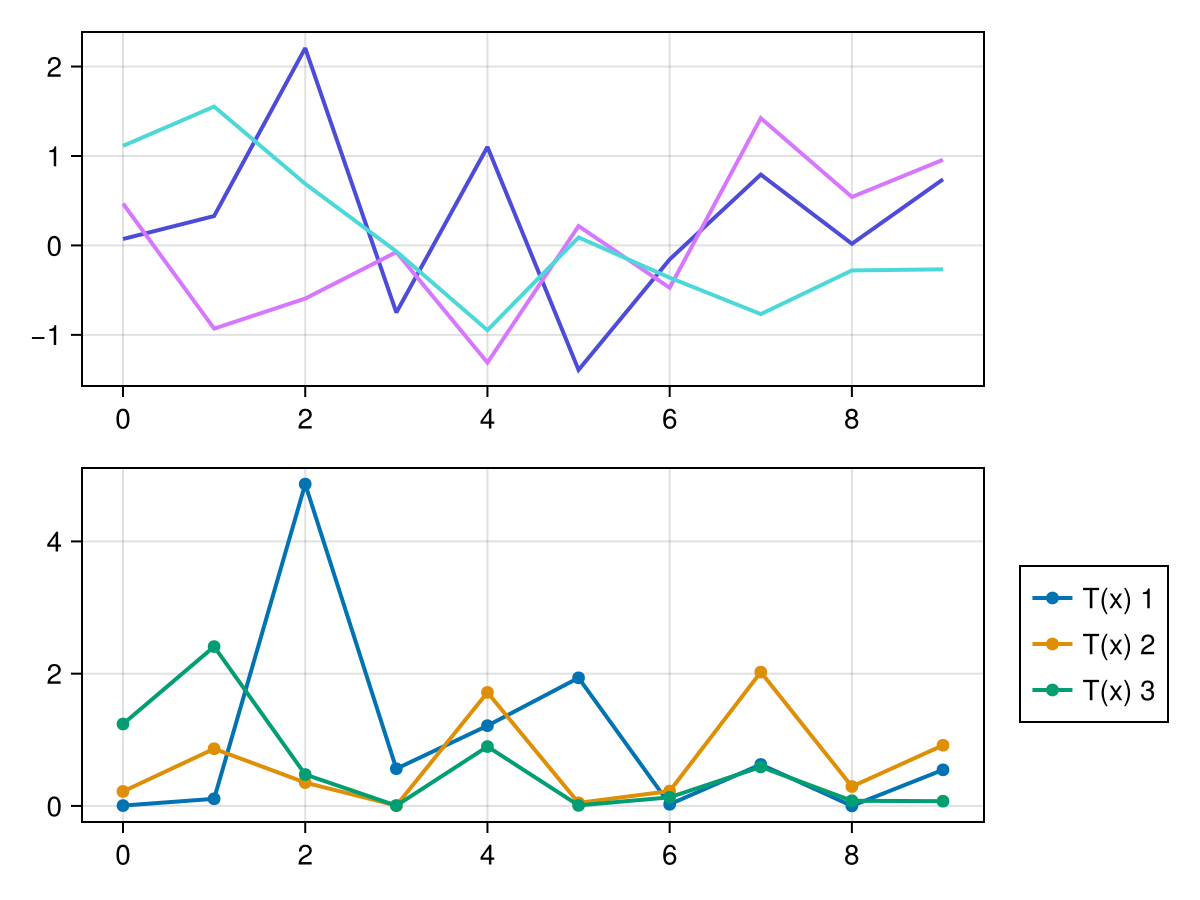

In [3]:
# basic plot and legend (with transform)
f = Figure()

plot(f[1,1], traj, :x)

ax = Axis(f[2, 1])
labels = ["T(x) $i" for i in 1:size(traj.x, 1)]
p = plot!(
    ax, traj, :x, 
    transform=x -> x .^ 2, 
    labels=labels, color=:seaborn_colorblind, marker=:circle,
)
Legend(f[2,2], ax)
f

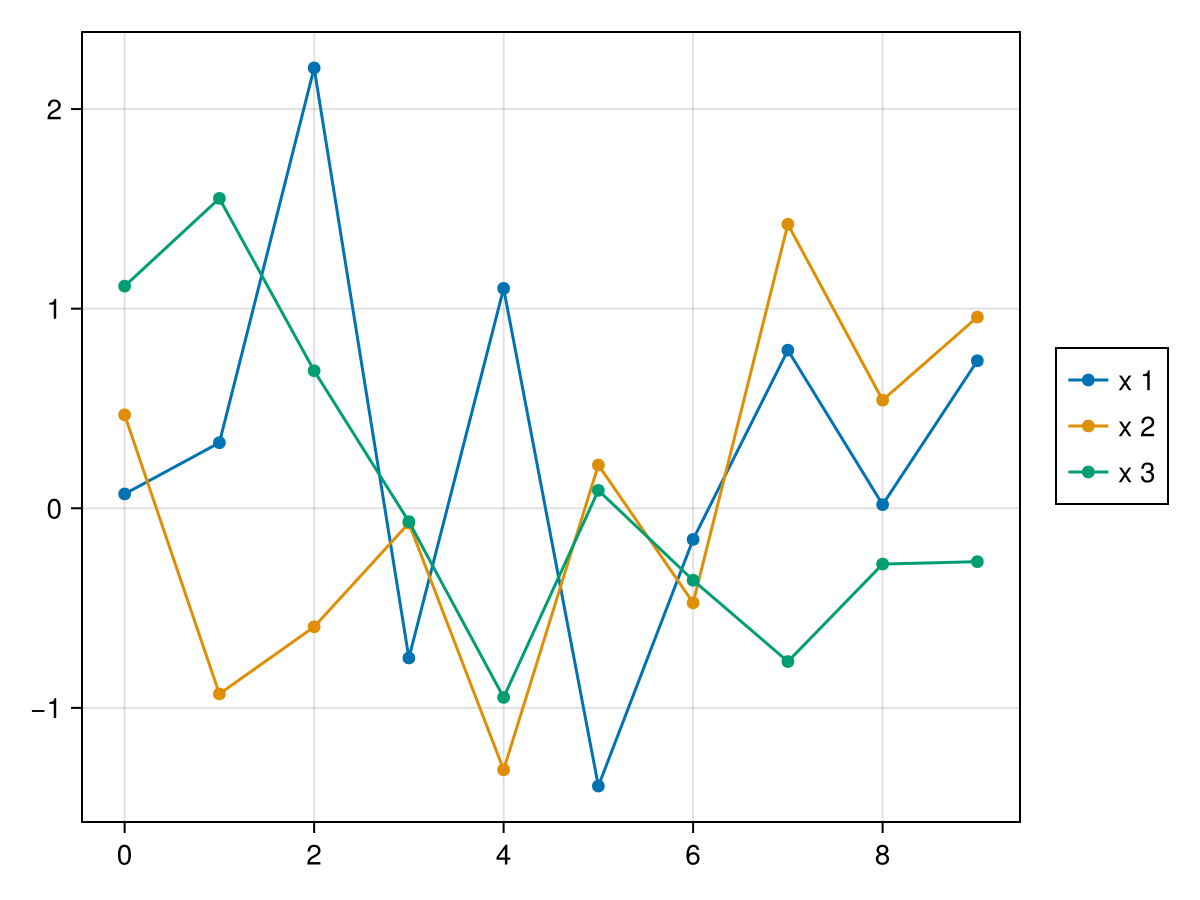

In [4]:
# automate some of the previous work with a recipe
f = Figure()
ax = Axis(f[1,1])
p = namedplot!(ax, traj, :x)
Legend(f[1,2], ax)
f

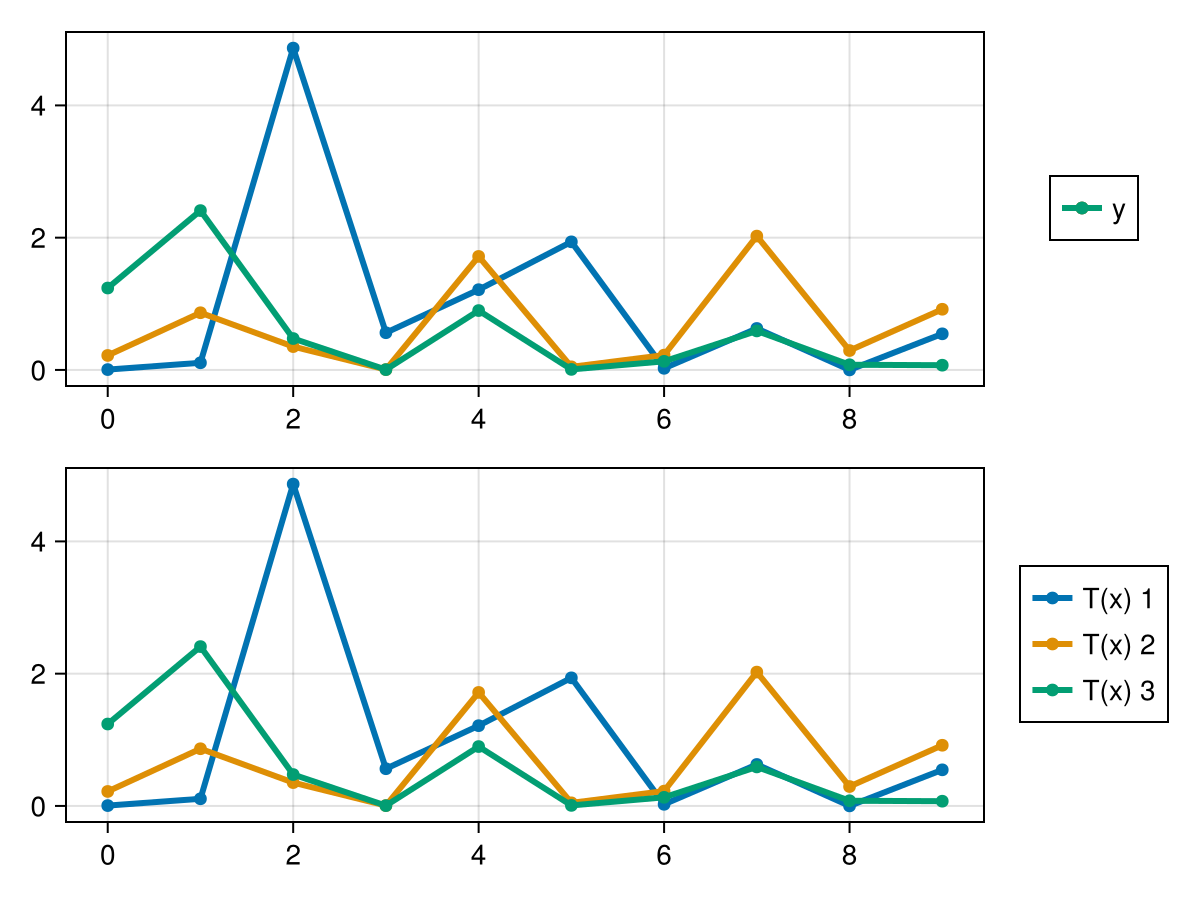

In [5]:
# Ability to apply transformations and merge names
f = Figure()
ax = Axis(f[1,1])
p = namedplot!(ax, traj, :x, "y", x -> x .^ 2, linewidth=3, marker=:circle, merge=true)
Legend(f[1,2], ax, merge=true)

ax = Axis(f[2,1])
p = namedplot!(ax, traj, :x, nothing, x -> x .^ 2, linewidth=3, marker=:circle)
Legend(f[2,2], ax)
f

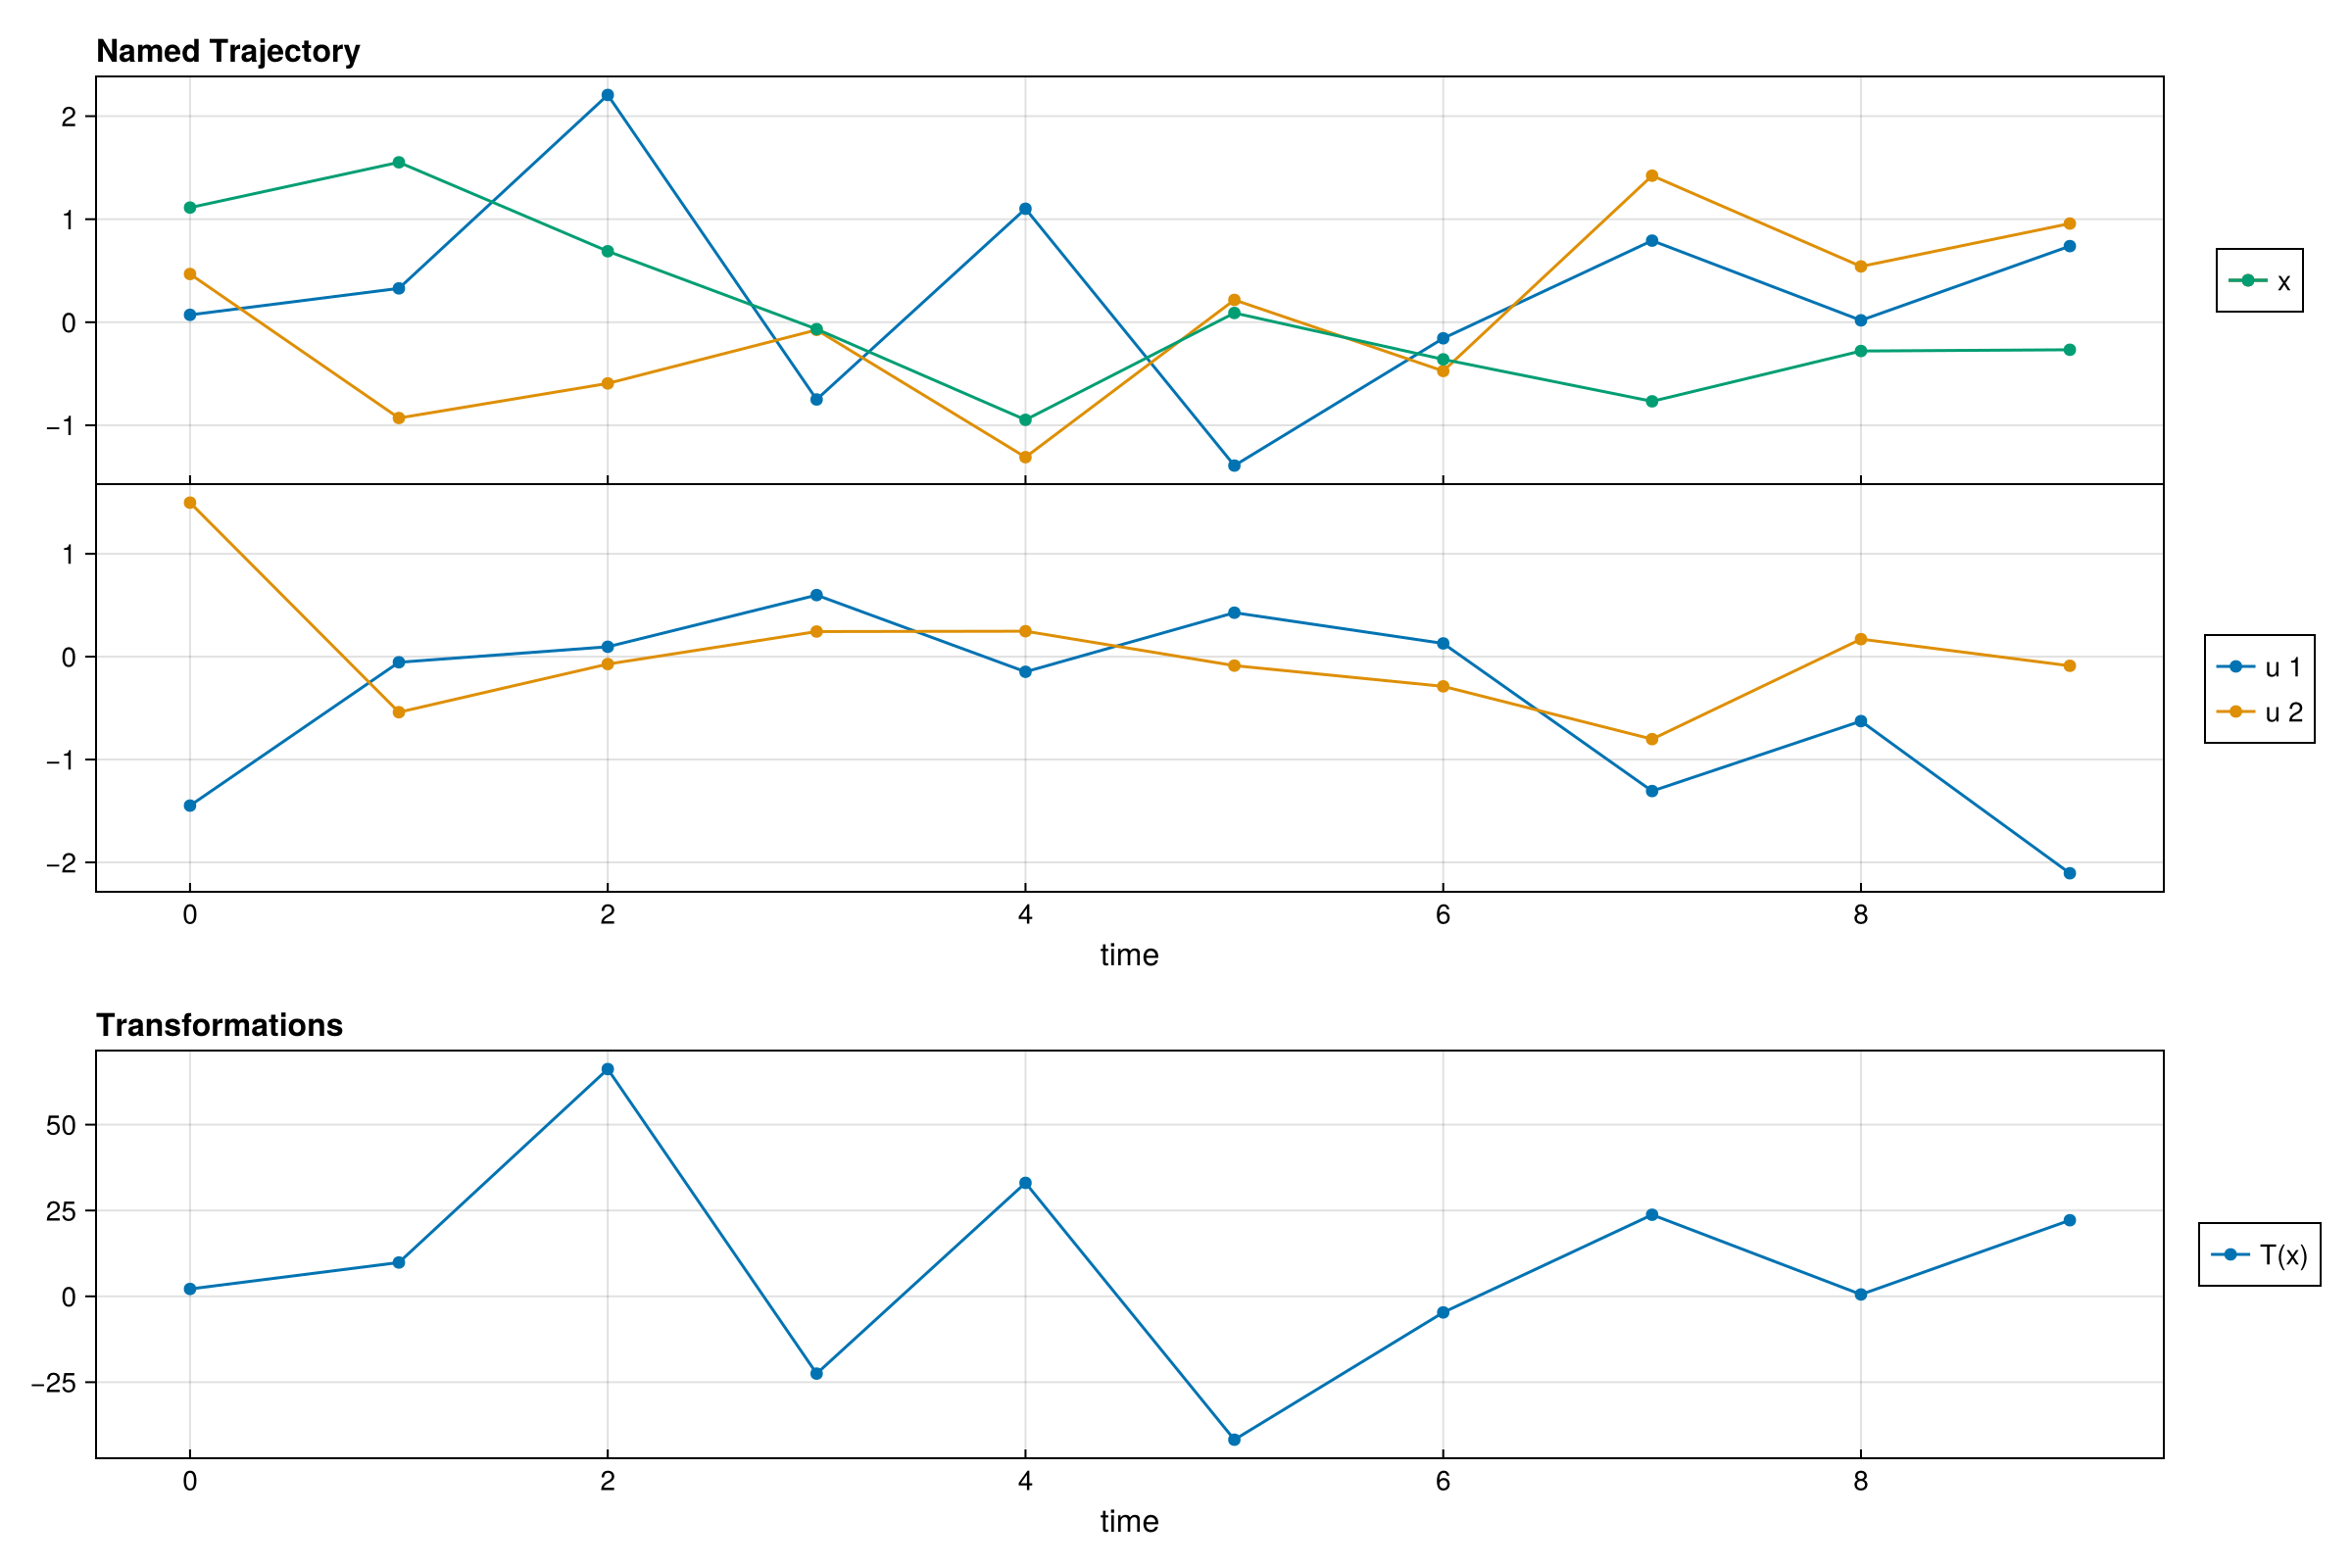

In [6]:
# create a figure with a trajectory plot
trajectoryplot(
    traj, 
    merge_labels=[true, false],
    transformations=(x = x -> [x[1] * 30],), 
    merge_transformation_labels=true,
)

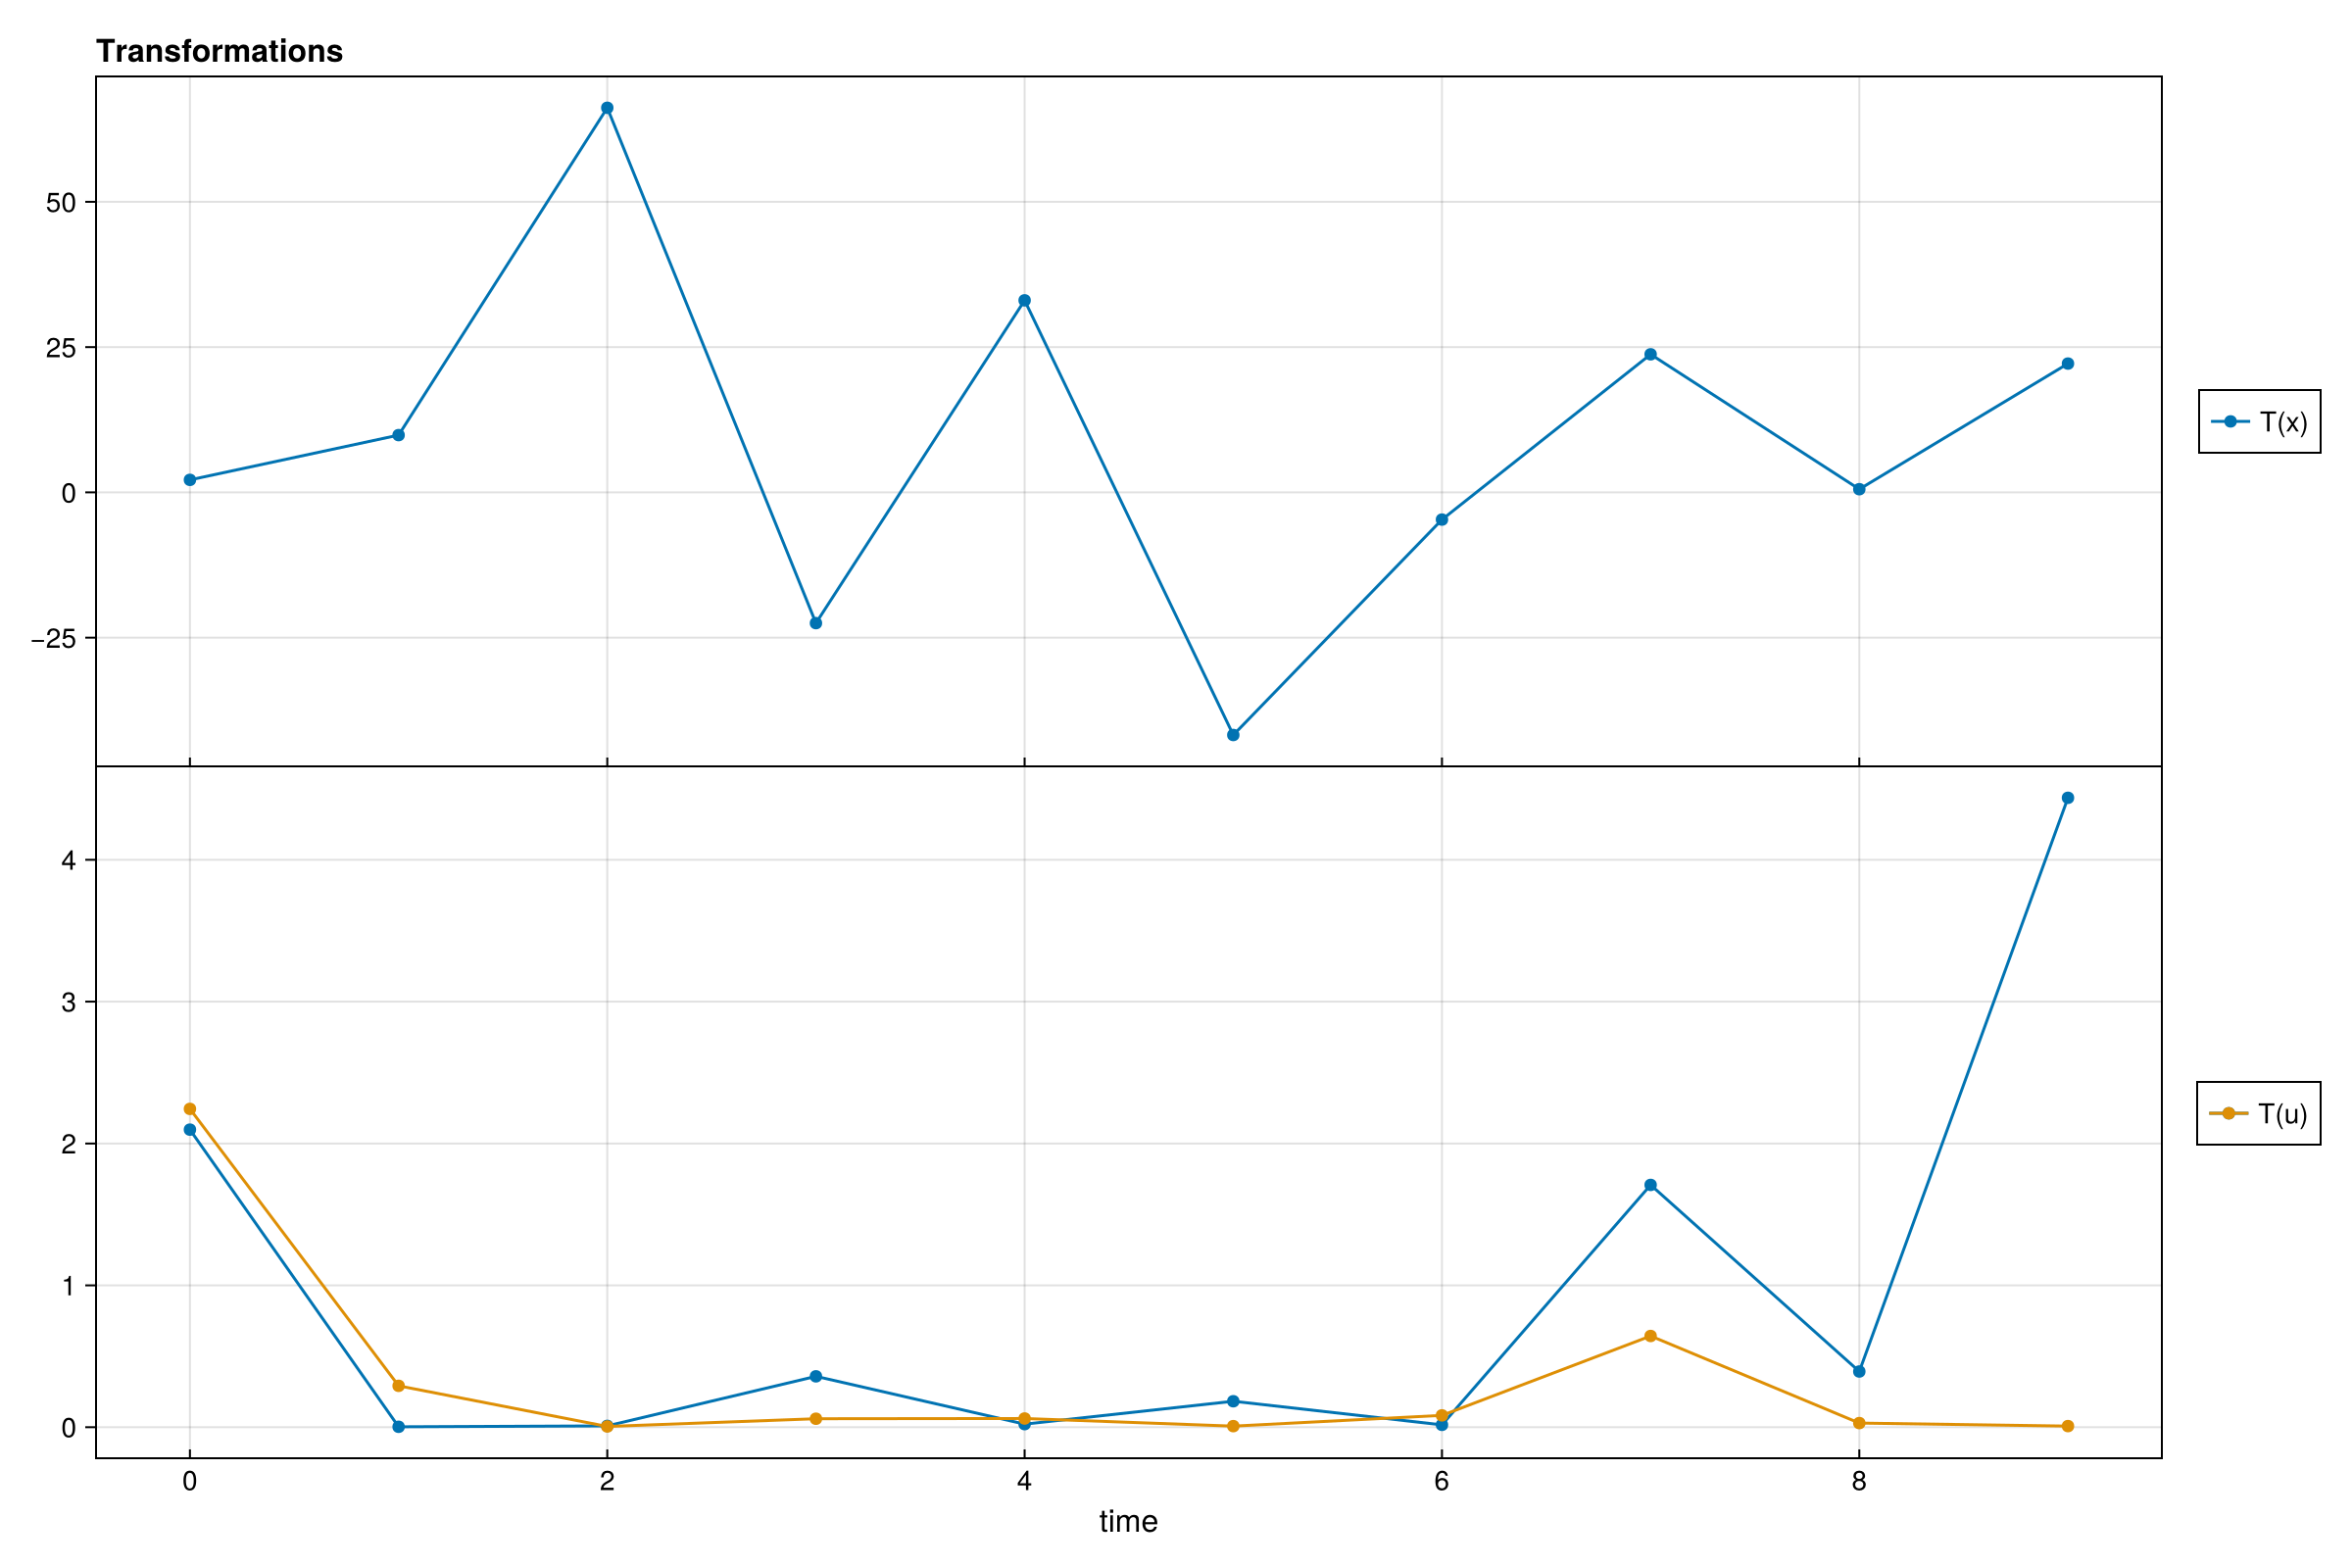

In [7]:
# test multiple transformations TODO: should we have a better way to handle empty Symbols[]?
trajectoryplot(
    traj, Symbol[],
    merge_labels=[true, false],
    transformations=(x = x -> [x[1] * 30], u = u -> u .^2), 
    merge_transformation_labels=true,
)

In [8]:
# typeof((x = x -> [x[1] * 30], u = u -> u .^2)) <: NamedTuple{<:Any, <:Tuple{Vararg{<:Function}}}
# typeof((x = x -> [x[1] * 30],)) <: NamedTuple{<:Any, <:Tuple{Vararg{<:Function}}}

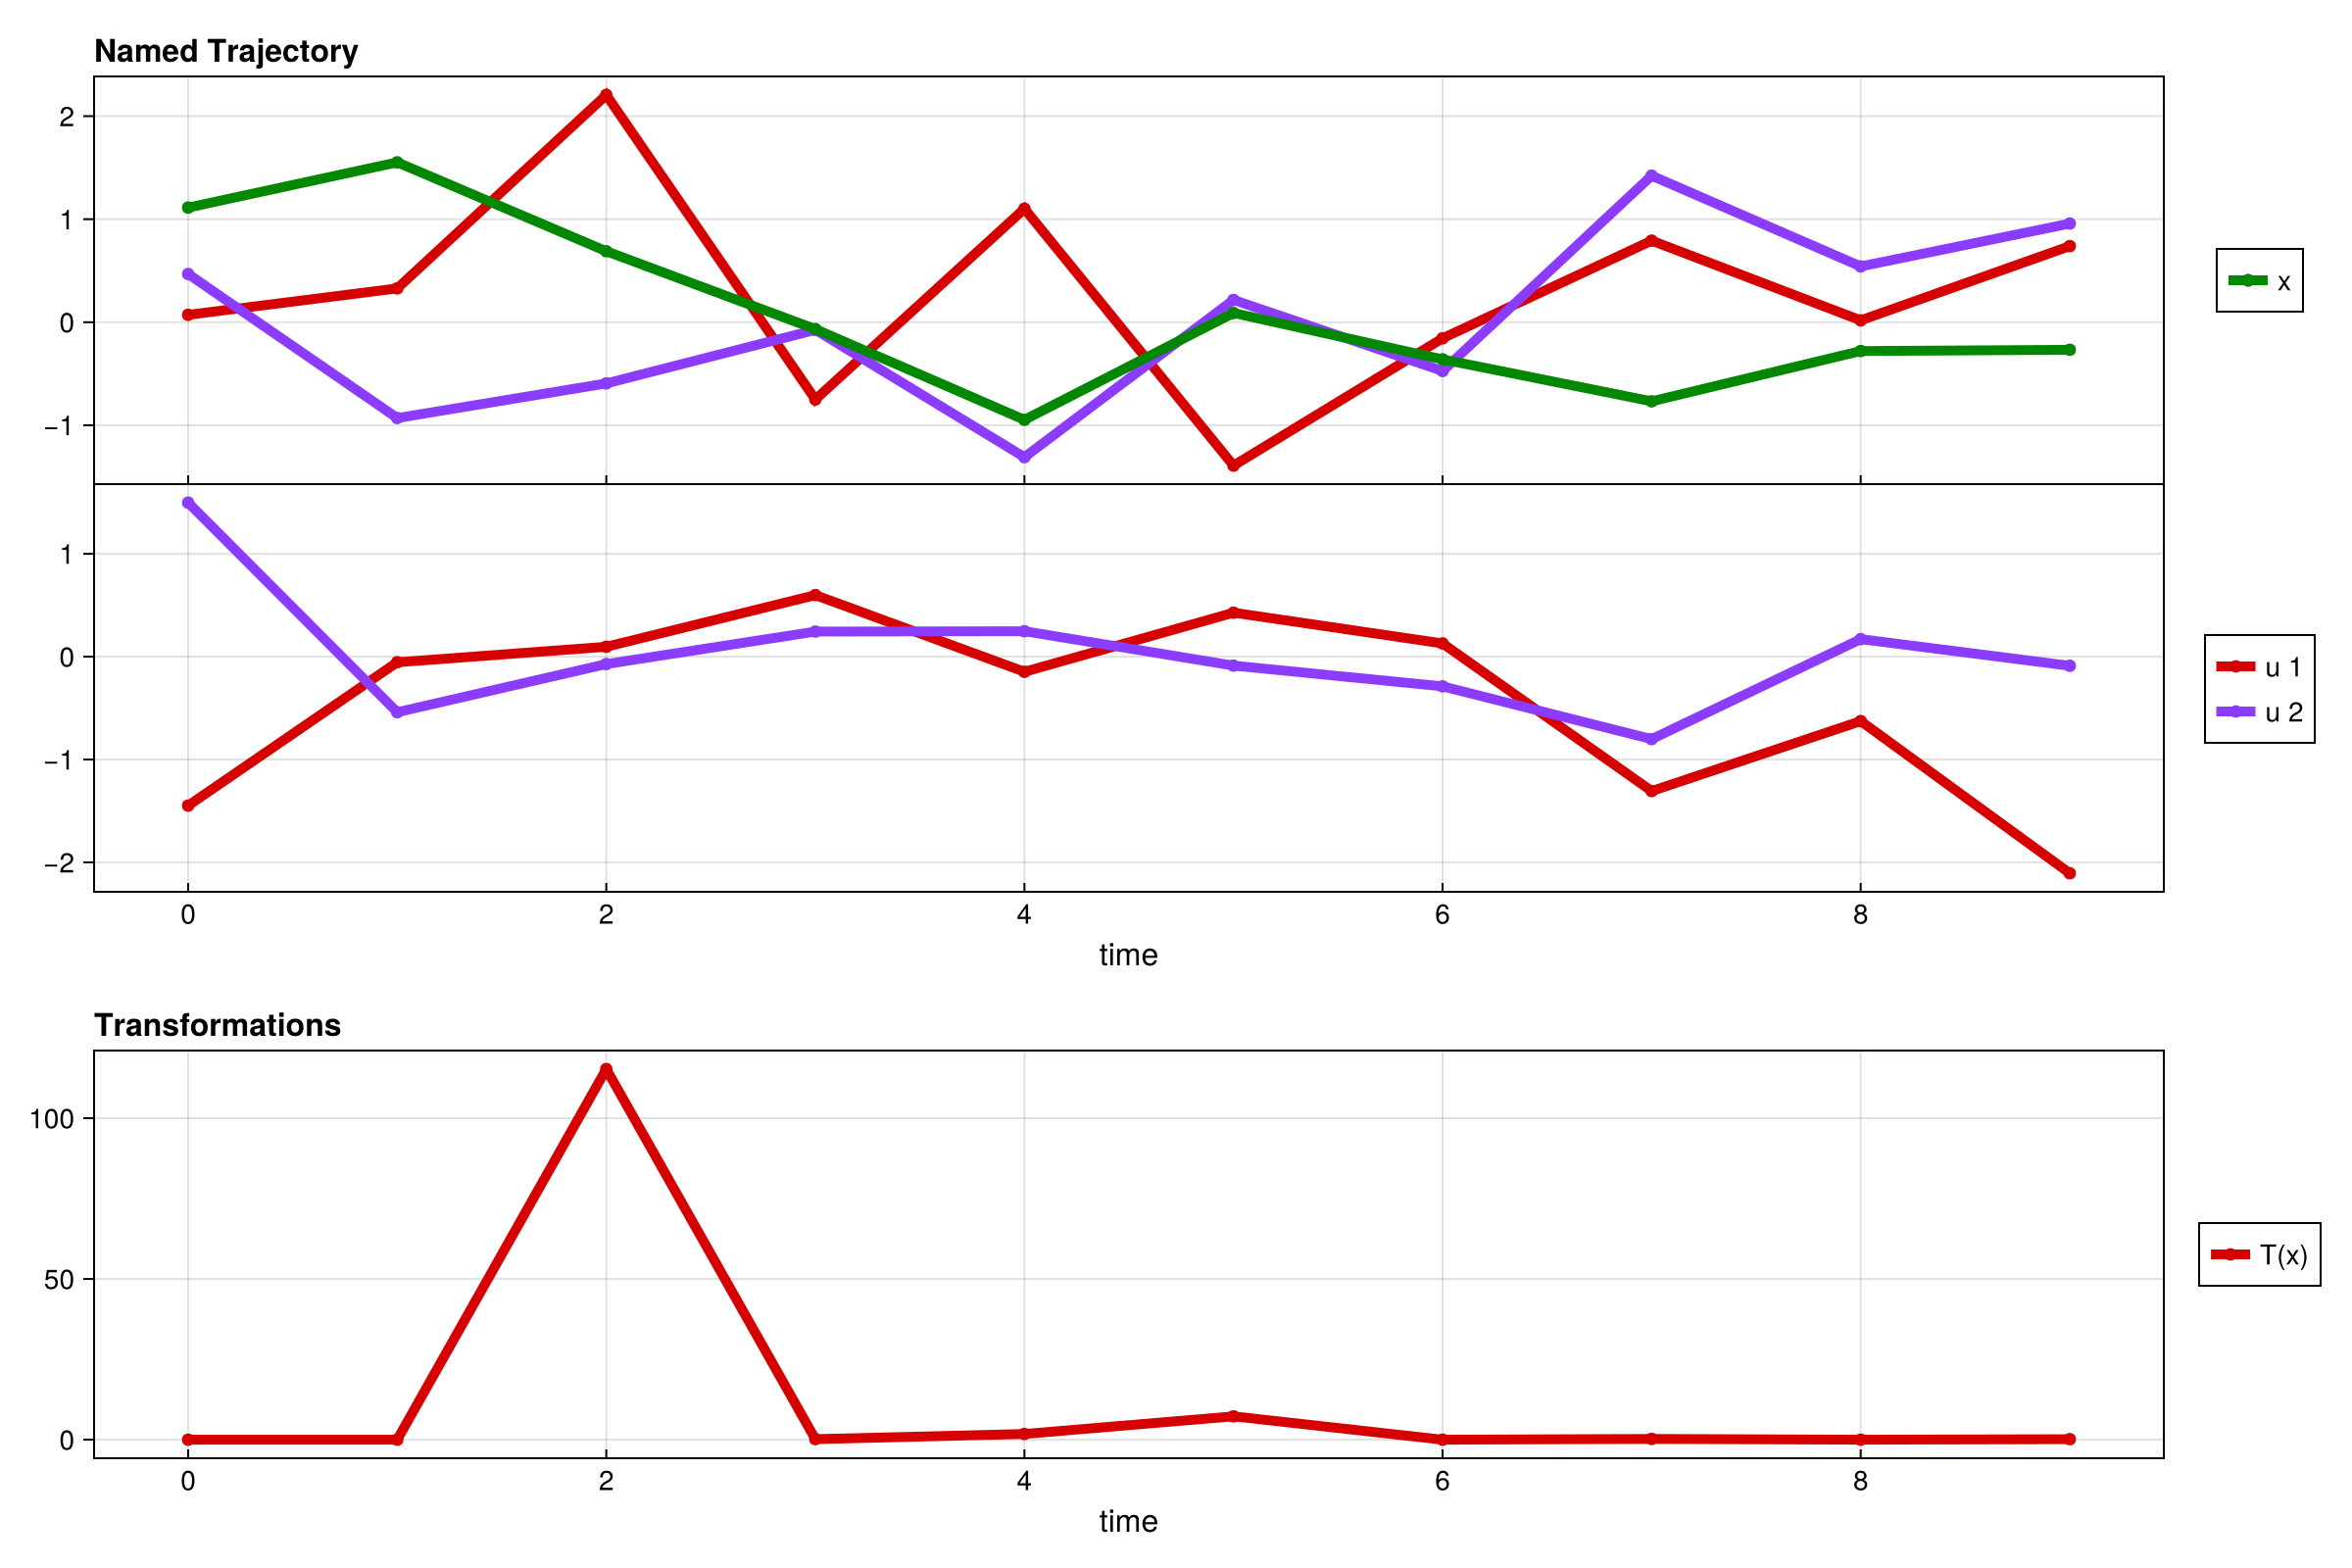

In [9]:
# test passing in series kwargs
trajectoryplot(
    traj, 
    [:x, :u],
    merge_labels=[true, false],
    transformations=(x = x -> [x[1] ^6],), 
    merge_transformation_labels=true,
    linewidth=5,
    color=:glasbey_bw_minc_20_n256,
)

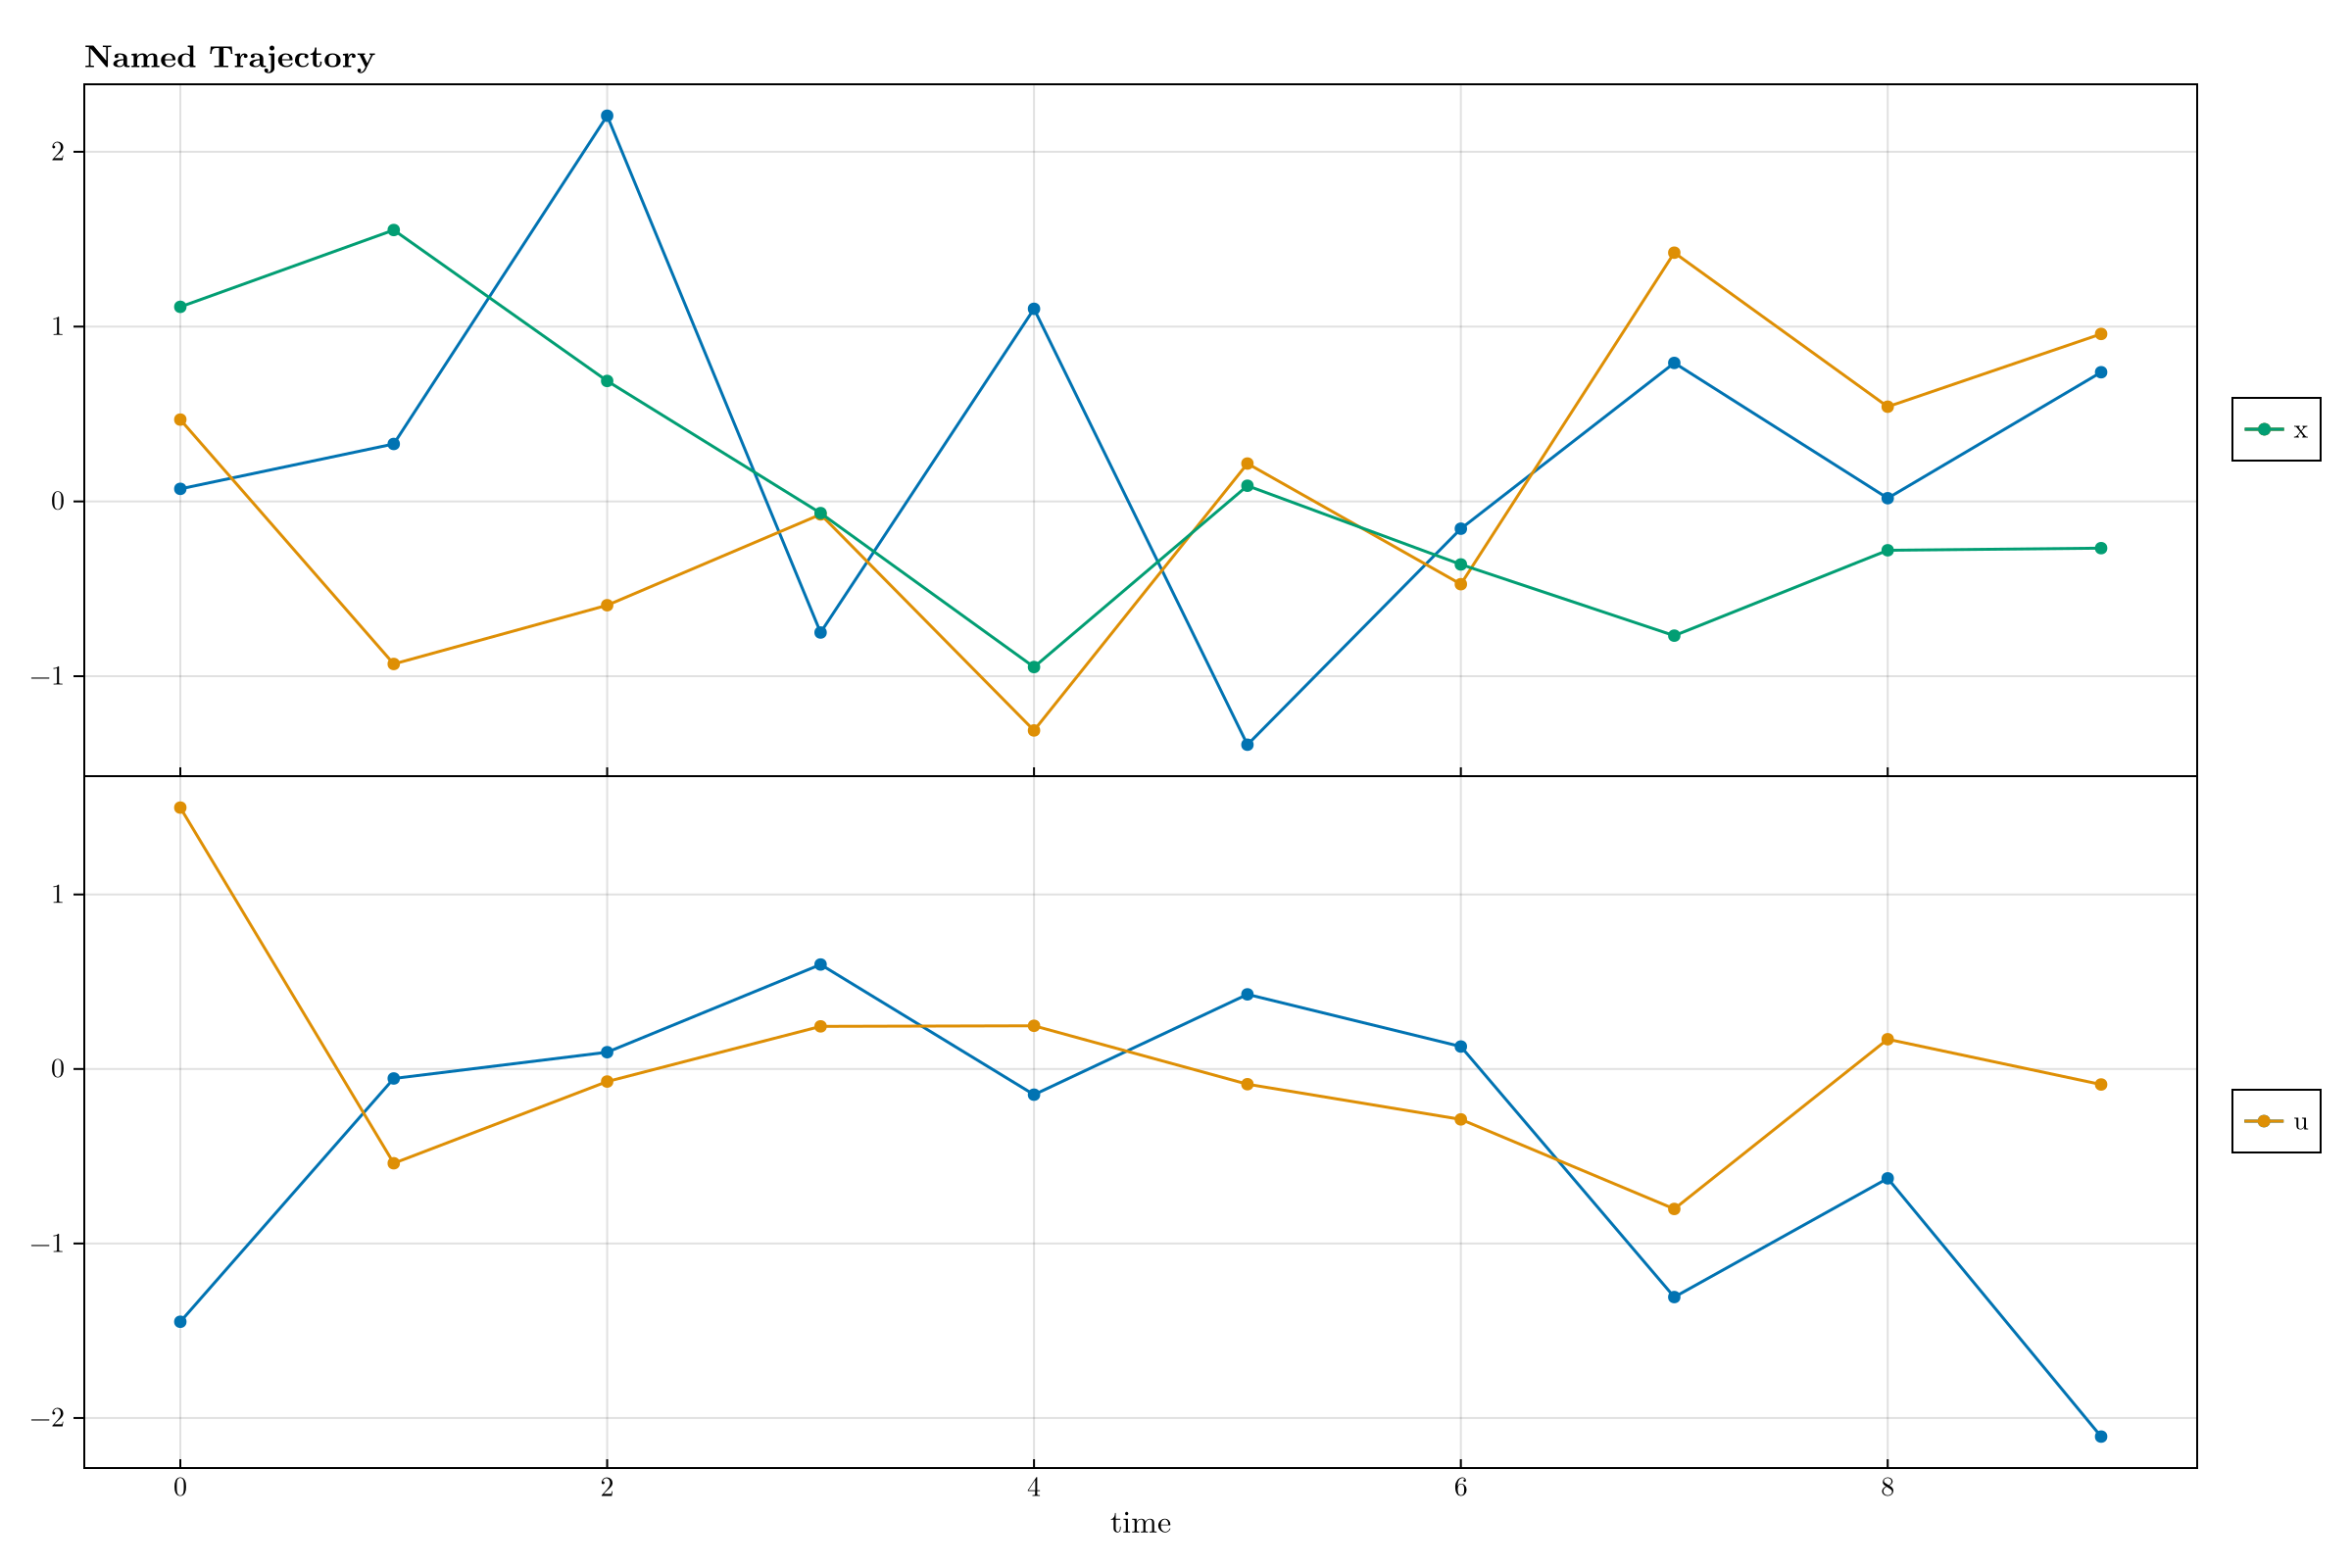

In [10]:
# test setting a theme
trajectoryplot(theme_latexfonts(), traj, merge_labels=true)

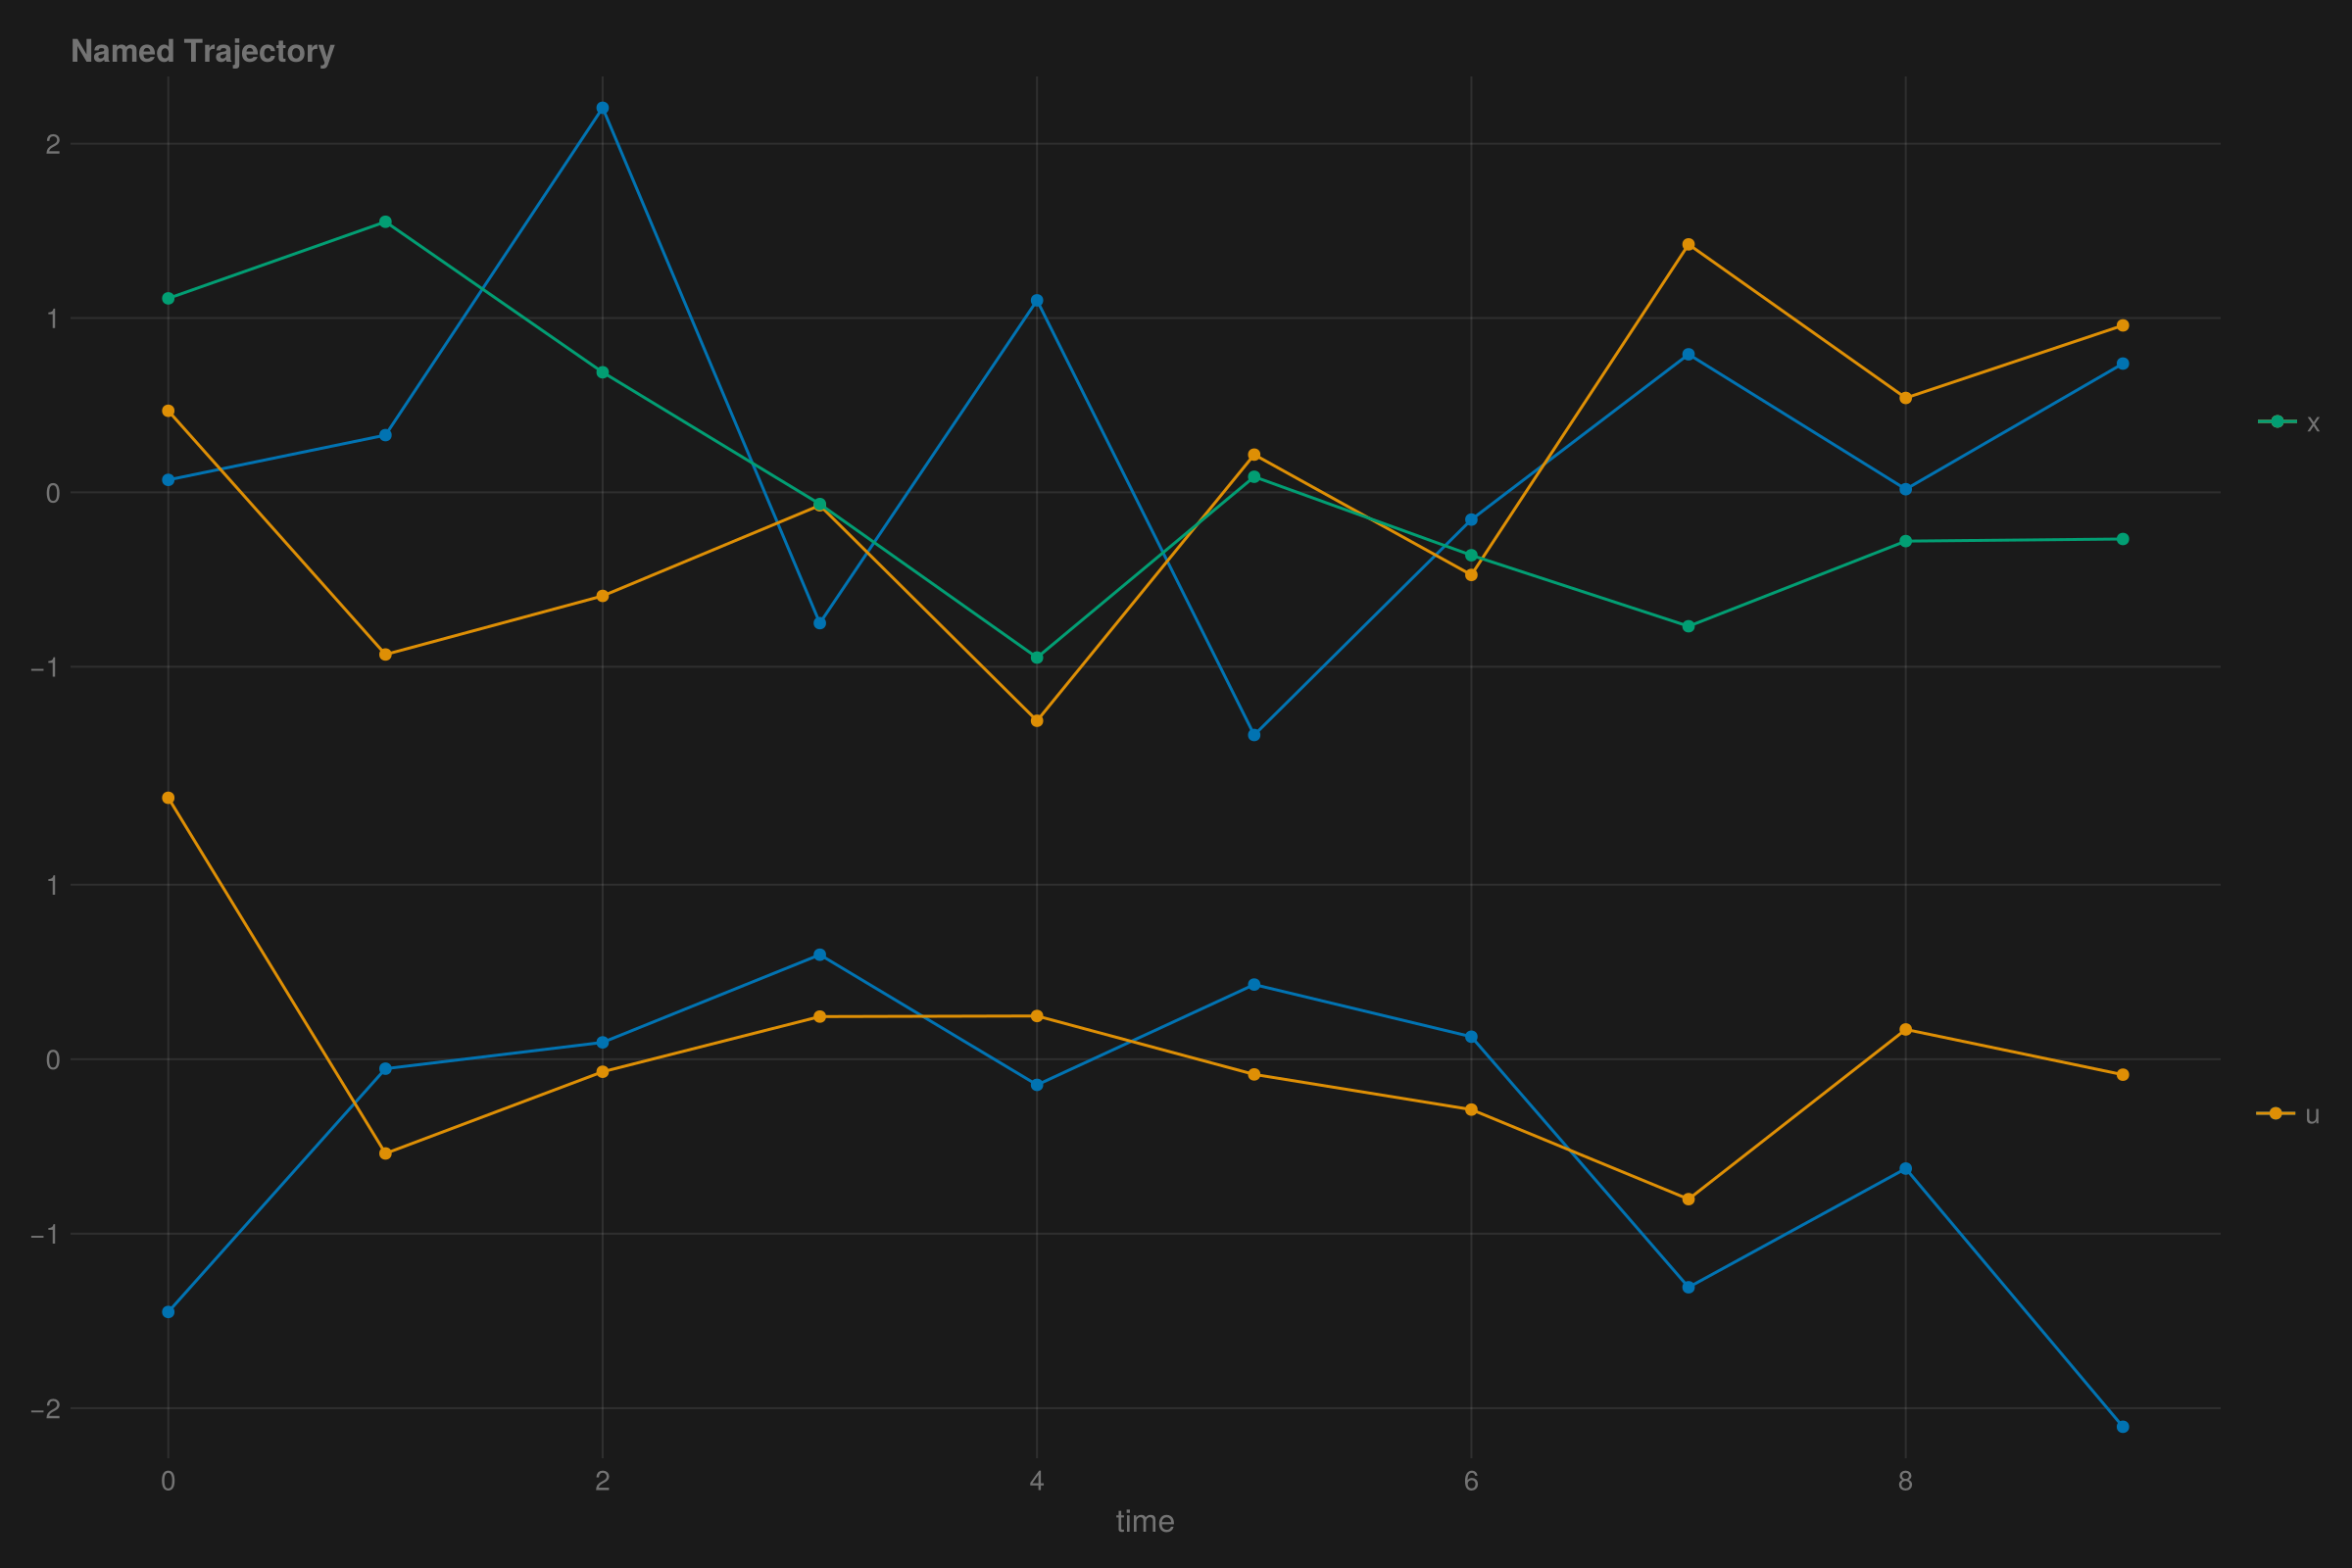

In [12]:
trajectoryplot(theme_dark(), traj, merge_labels=true)